<a href="https://colab.research.google.com/github/heavy1368/ON2022/blob/main/Obliczenia_naukowe_projekt_nr3_samochod_elektryczny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obliczenia naukowe — Projekt nr 3: samochód elektryczny

#Projekt nr 3: samochód elektryczny (maks. 60 pkt)
Masz do dyspozycji samochód elektryczny o zasięgu 200 km. Jesteś zapalonym podróżnikiem i chcesz
zwiedzić wszystkie miasta wojewódzkie w Polsce (18 miast). Wykonaj poniższe zadania, a ich rezultaty
zaprezentuj w raporcie (plik ipynb + wygenerowany plik pdf).

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

#Zadanie 1 (10 pkt)
Na podstawie pliku macierz_dostepnosci.xlsx stwórz tabelę odległości między każdą parą miast wojewódzkich (odległość drogowa zaokrąglona do pełnych kilometrów). Brakujące dane uzupełnij na podstawie Google Maps.


In [66]:
xlsx = pd.read_excel('https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/6338/11/1/1/macierz_dostepnosci.xlsx', sheet_name='macierz_dostępności')
pd.DataFrame(xlsx)


,Kod gminy wyjazdu\n(Kod gminy miejsca zamieszkania)a,Gmina wyjazdu\n(Gmina miejsca zamieszkania),Kod powiatu wyjazdu,Powiat wyjazdu,Kod województwa wyjazdu\n(Kod województwa miejsca zamieszkania),Województwo wyjazdu\n(Województwo miejsca zamieszkania),Kod gminy przyjazdu\n(Kod gminy miejsca pracy),Gmina przyjazdu\n(Gmina miejsca pracy),Kod powiatu przyjazdu,Powiat przyjazdu,Kod województwa przyjazdu\n(Kod województwa miejsca pracy),Województwo przyjazdu\n(Województwo miejsca pracy),Odległość geodezyjna\n(w km),Odległość drogowa\n(w km),Czas przejazdub\n(w min.),Czas przejazdu\n(min:sek)
0,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201022.0,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,5.37,5.99,10.35,10:21
1,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201032.0,Gromadka,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,20.40,26.05,35.67,35:40
2,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201044.0,Nowogrodziec - miasto,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,13.95,17.41,23.92,23:55
3,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201045.0,Nowogrodziec - obszar wiejski,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,14.71,16.59,23.30,23:18
4,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201052.0,Osiecznica,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,17.68,20.32,27.48,27:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34984,3263011,Świnoujście,3263.0,Powiat m.Świnoujście,32.0,Zachodniopomorskie,3207045.0,Międzyzdroje - obszar wiejski,3207.0,Powiat kamieński,32.0,Zachodniopomorskie,10.37,23.30,33.43,33:26
34985,3263011,Świnoujście,3263.0,Powiat m.Świnoujście,32.0,Zachodniopomorskie,3262011.0,Szczecin,3262.0,Powiat m.Szczecin,32.0,Zachodniopomorskie,50.18,108.33,100.02,100:01
34986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34987,a W nawiasach podano opis zmiennych zastosowan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
dane=xlsx

In [174]:
dane=dane.rename(columns={'Gmina wyjazdu\n(Gmina miejsca zamieszkania)':'Wyjazd','Gmina przyjazdu\n(Gmina miejsca pracy)':'Przyjazd','Odległość drogowa\n(w km)':'Odleglosc'})
dane=dane[['Wyjazd','Przyjazd','Odleglosc']]
dane['Odleglosc']=dane['Odleglosc'].round(0)
dane


,Wyjazd,Przyjazd,Odleglosc
0,Bolesławiec,Bolesławiec,6.0
1,Bolesławiec,Gromadka,26.0
2,Bolesławiec,Nowogrodziec - miasto,17.0
3,Bolesławiec,Nowogrodziec - obszar wiejski,17.0
4,Bolesławiec,Osiecznica,20.0
...,...,...,...
34984,Świnoujście,Międzyzdroje - obszar wiejski,23.0
34985,Świnoujście,Szczecin,108.0
34986,NaN,NaN,NaN
34987,NaN,NaN,NaN


In [176]:
miasto = {'Białystok','Bydgoszcz','Gdańsk','Gorzów Wielkopolski','Katowice','Kielce','Kraków','Lublin','Łódź','Olsztyn','Opole','Poznań','Rzeszów','Szczecin','Toruń','Warszawa','Wrocław','Zielona Góra'}
dane=dane[dane.Wyjazd.isin(miasto) & dane.Przyjazd.isin(miasto)]
print(dane.isnull().sum())
dane


Wyjazd       0
Przyjazd     0
Odleglosc    0
dtype: int64


,Wyjazd,Przyjazd,Odleglosc
2638,Wrocław,Toruń,398.0
2640,Wrocław,Lublin,528.0
2641,Wrocław,Gorzów Wielkopolski,259.0
2642,Wrocław,Zielona Góra,151.0
2645,Wrocław,Łódź,224.0
...,...,...,...
34936,Szczecin,Warszawa,571.0
34940,Szczecin,Gdańsk,347.0
34944,Szczecin,Katowice,578.0
34945,Szczecin,Olsztyn,485.0


#Zadanie 2 (10 pkt)
Utwórz graf z wagami, którego wierzchołkami są nazwami miast wojewódzkich w Polsce, zaś krawędzie,
to drogi pomiędzy którymi możesz się poruszać swoim autem (odległość krótsze niż 200 km). Wagi mają
oznaczać odległości.

In [159]:
G = nx.from_pandas_edgelist(dane, source='Wyjazd', target='Przyjazd', edge_attr = 'Odleglosc')

In [166]:
d=dane['Odleglosc']
d

2638     398.0
2640     528.0
2641     259.0
2642     151.0
2645     224.0
         ...  
34936    571.0
34940    347.0
34944    578.0
34945    485.0
34949    264.0
Name: Odleglosc, Length: 196, dtype: float64

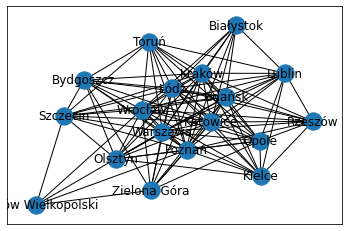

In [160]:
nx.draw_networkx(G,)

In [167]:
G.add_weighted_edges_from(d)



TypeError: ignored